In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [38]:
def pngToRGBA(img):
    # 将标签变为彩色图片并返回，实际分类时标签将200,500,600映射到0，1，2
    savetemp = np.zeros((img.shape[0], img.shape[1], 4))  # 用于存储彩色图片(带透明度)
    # 布尔值矩阵（第一维B，第二维G，第三维R）对三通道依次变换
    # 200.橘、Myo:(69.97.143); 500.蓝、LV:(172,158,122); 600.粉、RV:(212,133,175)
    Bool200 = (img == 200.)
    Bool500 = (img == 500.)
    Bool600 = (img == 600.)
    Bool0 = (img != 0.)

    savetemp[:, :, 0] = (Bool200).astype(np.uint8) * 69 + (Bool500).astype(np.uint8) * 172 + (Bool600).astype(np.uint8) * 212
    savetemp[:, :, 1] = (Bool200).astype(np.uint8) * 97 + (Bool500).astype(np.uint8) * 158 + (Bool600).astype(np.uint8) * 133
    savetemp[:, :, 2] = (Bool200).astype(np.uint8) * 143 + (Bool500).astype(np.uint8) * 122 + (Bool600).astype(np.uint8) * 175
    savetemp[:, :, 3] = (Bool0).astype(np.uint8) * 210 #透明度维度

    return savetemp

In [83]:
def gray_normalize(image):
    """normalize image to [0, 255]"""
    img_mean = image.mean()
    img_std = image.std()
    image1 = (image-img_mean) / img_std
    img_max = image1.max()
    img_min = image1.min()
    return (image1-img_min) / (img_max-img_min) * 255.

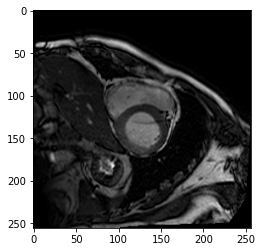

In [92]:
label_folder_path = os.path.join(os.getcwd(), "DataInit", "C0", "test", "Labels")
image_folder_path = os.path.join(os.getcwd(), "DataInit", "C0", "test", "Images")
save_folderpath = os.path.join(os.getcwd(), "Result")
file_name = "subject1_C0_6.npy"
label = np.load(os.path.join(label_folder_path, file_name))
label_png = pngToRGBA(label) #RGBA: 4 channels
image = np.load(os.path.join(image_folder_path, file_name))
image_norm = gray_normalize(image)
# img_gray3 = cv2.cvtColor(np.float32(image_norm), cv2.COLOR_GRAY2RGB) #3 channels gray(concat gray1 3 times)
img_trans = np.ones_like(image_norm) * 255
#3 channels gray enhancement images evidently
img_png = np.stack((image_norm, image_norm, image_norm, img_trans),  axis=-1)
# print(img_png.shape) #(256, 256, 4)

np.set_printoptions(threshold=np.inf)
# print(label_png.shape)
plt.imshow(image, cmap='gray')
# plt.imshow(img_png/ 255.)
# plt.imshow(label_png/ 255.)
plt.savefig(os.path.join(save_folderpath, "temp.png"))
plt.show()

In [114]:
def pngToRGBA_batch(img_array, pred_array, nrows=1, ncols=6, figure_size=(3,15),
             save_folderpath=os.path.join(os.getcwd(),"Result", "OverlaidImage"),
             save_filepath="subject10_DE_5.png"):
    # Input: pred_array: image_num * w*h in [0, type_num-1]; img_array: w*h
    # show them with given nrows and ncols
    main_title = "temp"
    savetemp = np.zeros((pred_array.shape[0], pred_array.shape[1], pred_array.shape[2], 4))  # 用于存储彩色图片

    # image_norm = gray_normalize(img_array)
    # img_trans = np.ones_like(image_norm) * 255
    # #3 channels gray enhancement images evidently
    # img_png = np.stack((image_norm, image_norm, image_norm, img_trans),  axis=-1)

    for img_index in range(nrows*ncols-1): #!!!!!!!type_num
        # 布尔值矩阵（第一维B，第二维G，第三维R）对三通道依次变换
        # 200.:(69.97.143); 500.:(172,158,122); 600.:(212,133,175)
        # Bool200 = (pred_array[img_index] == 1)
        # Bool500 = (pred_array[img_index] == 2)
        # Bool600 = (pred_array[img_index] == 3)
        Bool200 = (pred_array[img_index] == 200.)
        Bool500 = (pred_array[img_index] == 500.)
        Bool600 = (pred_array[img_index] == 600.)
        Bool0 = (pred_array[img_index] != 0.)
        # assemble to np.dstack
        savetemp[img_index, :, :, 0] = (Bool200).astype(np.uint8) * 69 + (Bool500).astype(np.uint8) * 172 + (Bool600).astype(np.uint8) * 212
        savetemp[img_index, :, :, 1] = (Bool200).astype(np.uint8) * 97 + (Bool500).astype(np.uint8) * 158 + (Bool600).astype(np.uint8) * 133
        savetemp[img_index, :, :, 2] = (Bool200).astype(np.uint8) * 143 + (Bool500).astype(np.uint8) * 122 + (Bool600).astype(np.uint8) * 175
        savetemp[img_index, :, :, 3] = (Bool0).astype(np.uint8) * 210 #透明度维度
    # cv2.imwrite(path, savetemp)
    fig = plt.figure(figsize=figure_size, dpi=240)
    for index in range(nrows*ncols):
        ax = fig.add_subplot(nrows,ncols,index+1)
        # fig.canvas.manager.set_window_title(fig_name)
        ax.imshow(img_array, cmap='gray') #first image: initial gray image
        # ax.imshow(img_png/ 255.) #first image: initial gray image

        if index != 0:    #overlay RGBA label if not first image
            ax.imshow(savetemp[index-1]/ 255.)
        ax.set_xticks([]) #close ticks
        ax.set_yticks([])

    # Set up seam
    # plt.tight_layout() #tight_layout
    plt.subplots_adjust(wspace=0, hspace=0) #seamless layout
    save_filepath = save_filepath.split(".")[0]+".png"
    plt.axis('off')
    plt.savefig(os.path.join(save_folderpath, save_filepath)) #save before show

    # plt.close()
    print(main_title + ' is ok')

    return savetemp

temp is ok


array([[[[  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.

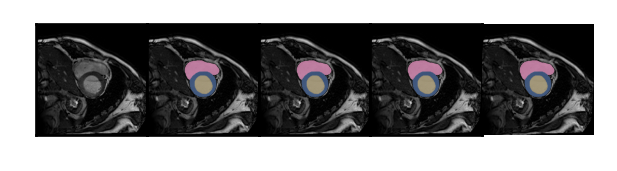

In [115]:
label_folder_path = os.path.join(os.getcwd(), "DataInit", "C0", "test", "Labels")
image_folder_path = os.path.join(os.getcwd(), "DataInit", "C0", "test", "Images")
save_folderpath = os.path.join(os.getcwd(), "Result")
file_name = "subject1_C0_6.npy"
label = np.load(os.path.join(label_folder_path, file_name))
image = np.load(os.path.join(image_folder_path, file_name))

pred_array = np.stack((label, label, label, label), axis=0)
pngToRGBA_batch(image, pred_array, nrows=1, ncols=5, figure_size=(3,15),
             save_folderpath=save_folderpath, save_filepath="subject10_DE_5.png")